In [343]:
import os

import pandas as pd
import numpy as np
import geopandas as gpd 
import rasterio 
from rasterio.plot import  show, adjust_band
import seaborn as sns 
import matplotlib.pyplot as plt

In [381]:
archangelskiy = pd.read_csv('points_gps/arch_crc.csv', encoding=  'ANSI', sep = ';')
archangelskiy['region'] = 'Архангельский'
archangelskiy['вес'] =archangelskiy['вес'] - archangelskiy['тара']
archangelskiy_points = gpd.read_file('points_gps/arch_points.geojson')

raster_list = os.listdir('raster_data')
raster_dir ='raster_data/' + raster_list[-1]


raster = rasterio.open(raster_dir)
meta = raster.meta
NDVI = raster.read()[6]
NDTI = raster.read()[7]


In [382]:
X_ = archangelskiy_points.to_crs(meta['crs']).geometry.x
Y_ = archangelskiy_points.to_crs(meta['crs']).geometry.y

In [429]:
NDTI_points_dict ={}

for i in range(len(archangelskiy_points.name)):
    ind =  (raster.index(X_[i],Y_[i]))
    NDTI_points_dict[archangelskiy_points.name[i]] = NDTI[ind[0], ind[1]]
NDTI_values = pd.DataFrame.from_dict(NDTI_points_dict, orient='index',).reset_index()
NDTI_values.columns = ['точка',"value"]
NDTI_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   точка   9 non-null      object 
 1   value   9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes


In [433]:
archangelskiy_weights = archangelskiy[['точка', 'вес','%']].groupby('точка').mean().reset_index()
archangelskiy_weights.точка = archangelskiy_weights.точка.astype('int')
archangelskiy_weights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   точка   7 non-null      int32  
 1   вес     7 non-null      float64
 2   %       7 non-null      float64
dtypes: float64(2), int32(1)
memory usage: 268.0 bytes


In [436]:
NDTI_values.точка = NDTI_values.точка.astype('int')

In [457]:
NDTI_DF = archangelskiy_weights.merge(NDTI_values, on = 'точка', how = 'outer')

In [460]:
NDTI_DF = NDTI_DF.fillna(value = 0)

In [466]:
NDTI_DF.columns = ['точка', 'вес', 'percent', 'value']
NDTI_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   точка    9 non-null      int64  
 1   вес      9 non-null      float64
 2   percent  9 non-null      float64
 3   value    9 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 360.0 bytes


C:\Users\User\Anaconda3\envs\gee\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `percent` for parameter `y`

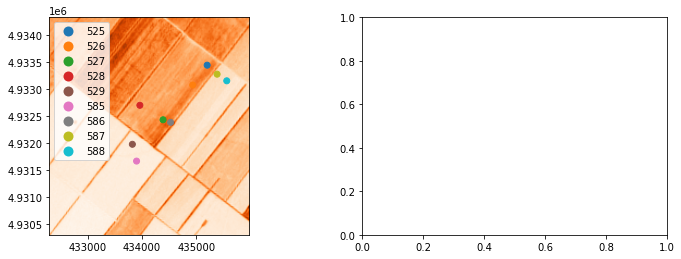

In [465]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4)) 

archangelskiy_points.to_crs(meta['crs']).plot(column = 'name', ax = ax1, legend = True)
show(NDTI, transform=raster.transform ,cmap= 'Oranges',ax = ax1)
sns.scatterplot(NDTI_DF, x ="value" , y = "percent", ax = ax2 )
NDTI_DF

In [441]:
NDTI_DF

,точка,value,вес,%
0,525,0.121709,53.50,62.50
1,526,0.115793,103.75,81.25
2,527,0.130336,81.25,68.75
3,528,0.099462,60.00,68.75
4,586,0.131532,156.00,96.75
5,587,0.049634,97.25,43.75
6,588,0.039044,68.50,33.75


In [359]:
archangelskiy_points.name

0    525
1    526
2    527
3    528
4    529
5    585
6    586
7    587
8    588
Name: name, dtype: object

In [288]:
meta['crs']

CRS.from_epsg(32638)

In [291]:
archangelskiy_points.to_crs(meta['crs']).geometry.x

0    435200.674770
1    434933.600768
2    434387.551914
3    433959.656936
4    433821.559312
5    433898.889285
6    434526.277638
7    435384.028173
8    435561.948863
dtype: float64

In [293]:
archangelskiy_points.to_crs(meta['crs']).geometry.y

0    4.933438e+06
1    4.933073e+06
2    4.932432e+06
3    4.932698e+06
4    4.931979e+06
5    4.931670e+06
6    4.932385e+06
7    4.933272e+06
8    4.933150e+06
dtype: float64

In [ ]:
archangelskiy_points.to_crs

In [7]:
raster_list = os.listdir('raster_data')

In [259]:
raster_dir ='raster_data/' + raster_list[1]
raster = rasterio.open(raster_dir)
meta = raster.meta
NDVI = raster.read()[6]
NDTI = raster.read()[7]


In [294]:
raster.index(435200.674770,4.933438e+06)

(88, 291)

In [274]:
NDTI.shape

(401, 369)

In [295]:
NDTI[88, 291]

0.1196027

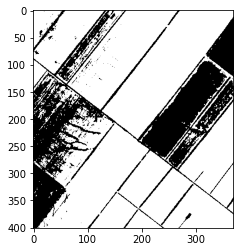

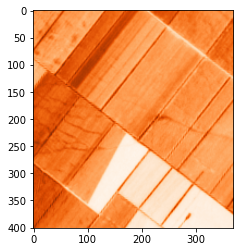

In [261]:
plt.imshow(NDTI, cmap= 'Oranges')

In [262]:
NDTI[mask] = np.nan

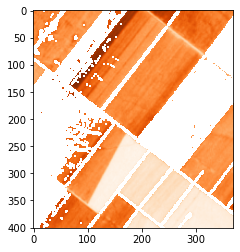

In [263]:
plt.imshow(NDTI, cmap= 'Oranges')

In [264]:
reshaped = NDTI.reshape(-1)
arr = reshaped[~np.isnan(reshaped)]

In [265]:
top = arr.max()
bottom = arr.min()

In [266]:
m = (95 - 0)/(top - bottom)
b = -1 * (m * bottom)

In [267]:
def RC_cover(x):
    rc = (m * x) + b 
    return(rc)

In [268]:
CRC = RC_cover(NDTI)

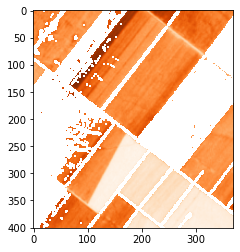

In [269]:
plt.imshow(CRC, cmap= 'Oranges' )

0.0